# Checkpoint 1 - Análise de dados de filmes (movies) ou séries
Data Science and Statistical Computing - 2 ESPW<br>
###### Gabriela Trevisan da Silva (RM99500)<br>
###### Rafael Pedra Franck (RM550875)<br>

Introdução
<br>
Análise de Dados de Filmes e Séries
<br>
Este notebook realiza uma análise detalhada de filmes e séries com base em dados de Netflix, IMDb e Rotten Tomatoes. O objetivo é responder a 10 questões avançadas de pesquisa, explorando várias dimensões dos dados.
<br>
Fontes de Dados Utilizadas

1. **Netflix**: Kaggle - [Netflix Shows Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows)
2. **Rotten Tomatoes**: Kaggle - [Rotten Tomatoes Dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/data)

In [ ]:
# Importação das Bibliotecas e Dados

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from bs4 import BeautifulSoup

In [ ]:
# carregar os dados
netflix_df = pd.read_csv('./netflix_data.csv')
rotten_tomatoes_movies_df = pd.read_csv('./rotten_tomatoes_movies.csv')
rotten_tomatoes_reviews_df = pd.read_csv('./rotten_tomatoes_critic_reviews.csv')

In [ ]:
# exibir as primeiras linhas dos datasets
def display_head(df, title, num_rows=5):
    print(f"### {title}")
    display(df.head(num_rows))
    print("\n")

In [ ]:
# visualização dos primeiros registros
display_head(netflix_df, "Primeiras Linhas do Dataset Netflix")

### Primeiras Linhas do Dataset Netflix


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# visualização dos primeiros registros
display_head(rotten_tomatoes_movies_df, "Primeiras Linhas do Dataset Rotten Tomatoes Movies")

### Primeiras Linhas do Dataset Rotten Tomatoes Movies


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [ ]:
# visualização dos primeiros registros
display_head(rotten_tomatoes_reviews_df, "Primeiras Linhas do Dataset Rotten Tomatoes Reviews")

### Primeiras Linhas do Dataset Rotten Tomatoes Reviews


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [ ]:
rotten_tomatoes_movies_df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [ ]:
rotten_tomatoes_reviews_df.columns

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# resumo das principais características dos datasets
def display_summary(df, title):
    print(f"### {title}")
    print("Informações do DataFrame:")
    print(df.info())
    print("\nDescrição Estatística:")
    print(df.describe(include='all'))
    print("\n")

In [ ]:
# exibindo resumo do datasets
display_summary(netflix_df, "Resumo do Dataset Netflix")

In [ ]:
# exibindo resumo do datasets
display_summary(rotten_tomatoes_movies_df, "Resumo do Dataset Rotten Tomatoes Movies")

In [ ]:
# exibindo resumo do datasets
display_summary(rotten_tomatoes_reviews_df, "Resumo do Dataset Rotten Tomatoes Reviews")

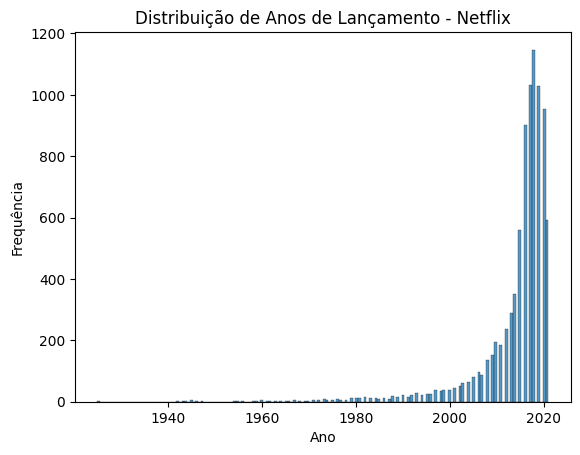

In [ ]:
# análise e visualização dos dados
sns.histplot(netflix_df['release_year'])
plt.title('Distribuição de Anos de Lançamento - Netflix')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.show()

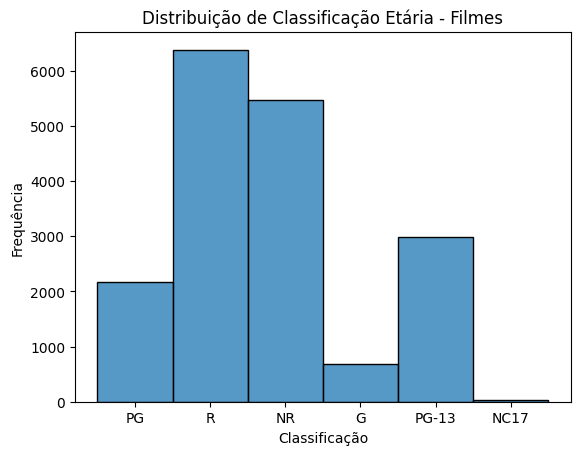

In [ ]:
# análise e visualização dos dados
sns.histplot(rotten_tomatoes_movies_df['content_rating'])
plt.title('Distribuição de Classificação Etária - Filmes')
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.show()

In [ ]:
"""
Questão 1: Qual é o gênero mais popular entre os filmes no Netflix em termos de
número de títulos?
Resposta: Dramas, International Movies, com 362 títulos
"""

# contagem de gêneros
popularidade_por_genero = netflix_df['listed_in'].value_counts()

# criar um DataFrame para visualização
genre_data = pd.DataFrame({
    'Gênero': popularidade_por_genero.index,
    'Número de Títulos': popularidade_por_genero.values
})

# exibir a contagem dos gêneros como uma tabela
print("### Contagem de Títulos por Gênero")
print(genre_data.to_string(index=False))


### Contagem de Títulos por Gênero
                                                                         Gênero  Número de Títulos
                                                   Dramas, International Movies                362
                                                                  Documentaries                359
                                                                Stand-Up Comedy                334
                                         Comedies, Dramas, International Movies                274
                               Dramas, Independent Movies, International Movies                252
                                                                       Kids' TV                220
                                                       Children & Family Movies                215
                                             Children & Family Movies, Comedies                201
                                            Documentaries, International M

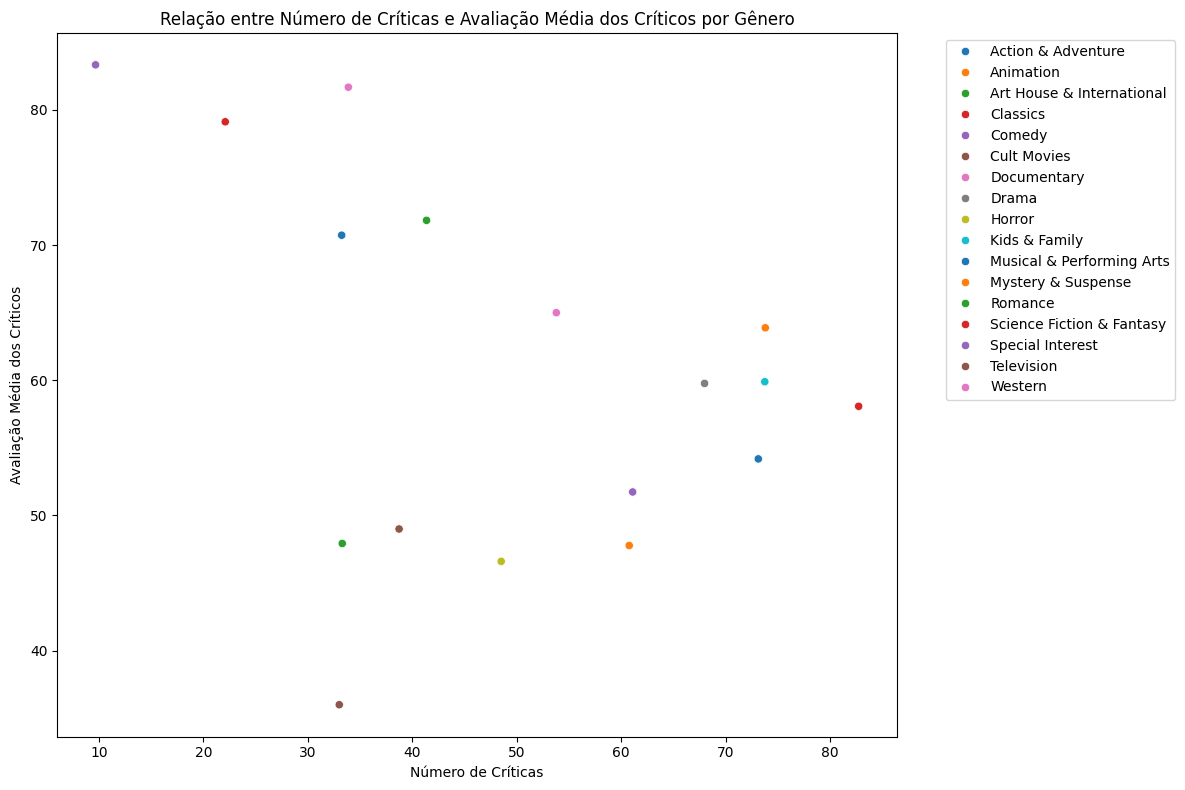

In [ ]:
"""
Questão 2: Qual é a relação entre o número de críticas no Rotten Tomatoes e a
avaliação média dos críticos para filmes em diferentes gêneros?
"""

# filtrar dados relevantes e lidar com valores nulos e considerar o primeiro
# gênero listado
genre_data = rotten_tomatoes_movies_df[['genres', 'tomatometer_count',
                                        'tomatometer_rating']].dropna()
genre_data['genres'] = genre_data['genres'].str.split(',').apply(lambda x:
                                                                 x[0].strip())


# agrupar por gênero
genre_summary = genre_data.groupby('genres').agg({
    'tomatometer_count': 'mean',
    'tomatometer_rating': 'mean'
}).reset_index()

# plotar o gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=genre_summary,
    x='tomatometer_count',
    y='tomatometer_rating',
    hue='genres',
    palette='tab10'
)
plt.title('Relação entre Número de Críticas e Avaliação Média dos Críticos por Gênero')
plt.xlabel('Número de Críticas')
plt.ylabel('Avaliação Média dos Críticos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

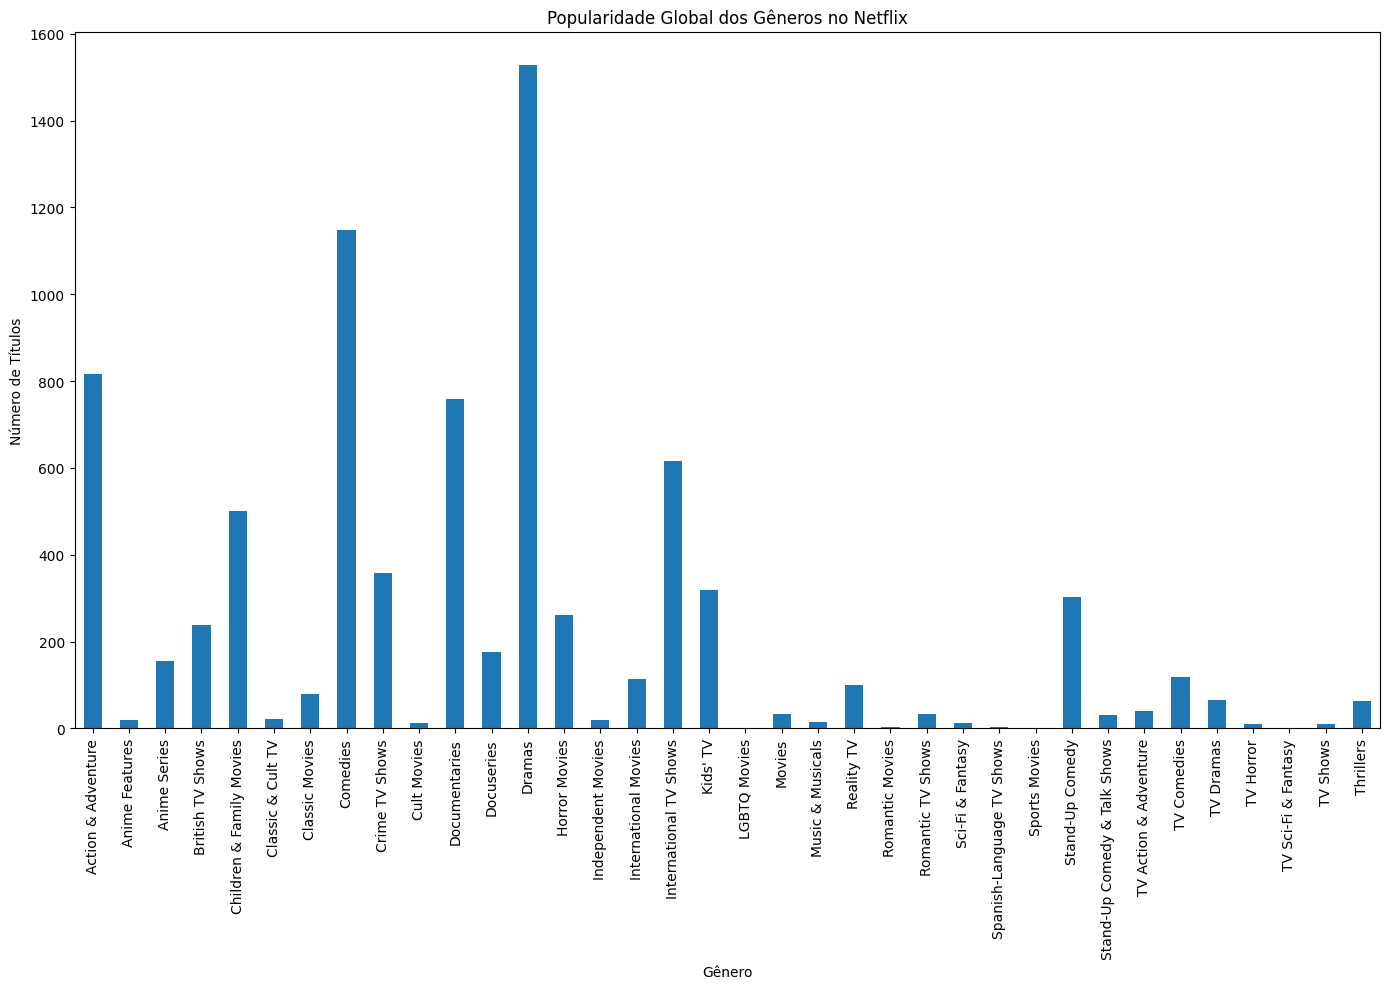

In [ ]:
"""
Questão 3: Quais são os gêneros mais populares no Netflix por país e como isso
se compara com a popularidade global?
"""

# contar o número de títulos por gênero e país
country_genre_counts = netflix_df[['country', 'listed_in']].dropna()
country_genre_counts['listed_in'] = country_genre_counts['listed_in'].str.split(',').apply(lambda x: x[0].strip())

# agrupar e contar
country_genre_counts = country_genre_counts.groupby(['country', 'listed_in']).size().unstack().fillna(0)

# plotar o gráfico de barras
plt.figure(figsize=(14, 10))
country_genre_counts.sum().plot(kind='bar')
plt.title('Popularidade Global dos Gêneros no Netflix')
plt.xlabel('Gênero')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

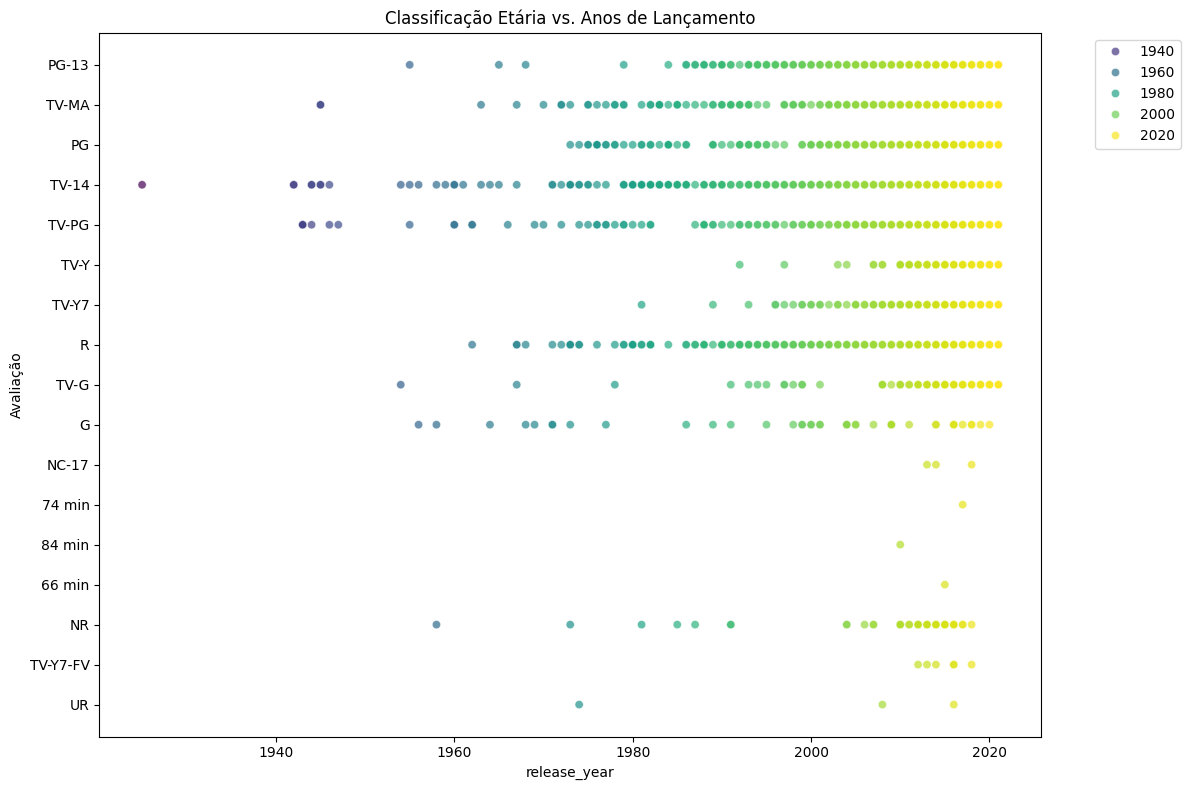

In [ ]:
"""
Questão 4: Como a classificação etária dos filmes na Netflix se relaciona
com seus anos de lançamento ao longo do tempo?
"""

# filtrar e preparar os dados
netflix_df = netflix_df[['release_year', 'rating']].dropna()

# plotar o gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=netflix_df,
    # x='duration',
    x='release_year',
    y='rating',
    hue='release_year',
    palette='viridis',
    alpha=0.7
)
plt.title('Classificação Etária vs. Anos de Lançamento')
# plt.xlabel('Duração (min)')
plt.ylabel('Avaliação')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

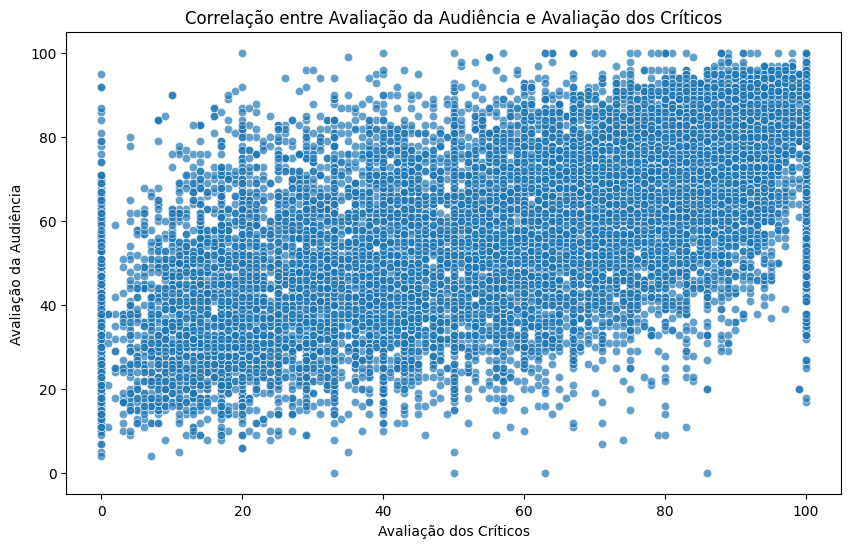

Correlação entre Avaliação da Audiência e Avaliação dos Críticos: 0.65


In [ ]:
"""
Questão 5: Qual é a correlação entre a avaliação da audiência e a avaliação dos
críticos para os filmes no Rotten Tomatoes?
"""

# filtrar e preparar os dados
ratings_data = rotten_tomatoes_movies_df[['audience_rating', 'tomatometer_rating']].dropna()

# plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=ratings_data,
    x='tomatometer_rating',
    y='audience_rating',
    alpha=0.7
)
plt.title('Correlação entre Avaliação da Audiência e Avaliação dos Críticos')
plt.xlabel('Avaliação dos Críticos')
plt.ylabel('Avaliação da Audiência')
plt.show()

# calcular a correlação
correlation = ratings_data.corr().iloc[0, 1]
print(f'Correlação entre Avaliação da Audiência e Avaliação dos Críticos: {correlation:.2f}')


<ipython-input-119-365d2b5dff2b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


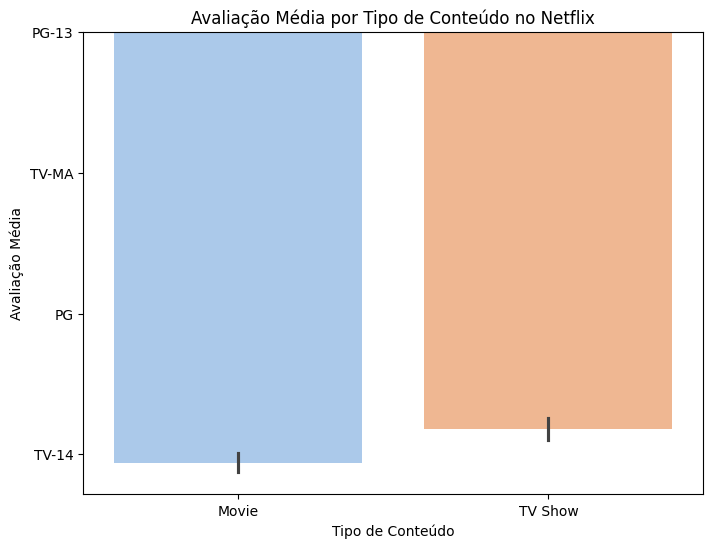

In [ ]:
"""
Questão 6: Como o tipo de conteúdo (filme vs. série) afeta a avaliação dos
filmes no Netflix?
"""

# filtrar e preparar os dados
type_rating = netflix_df[['type', 'rating']].dropna()

# plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    data=type_rating,
    x='type',
    y='rating',
    palette='pastel'
)
plt.title('Avaliação Média por Tipo de Conteúdo no Netflix')
plt.xlabel('Tipo de Conteúdo')
plt.ylabel('Avaliação Média')
plt.show()


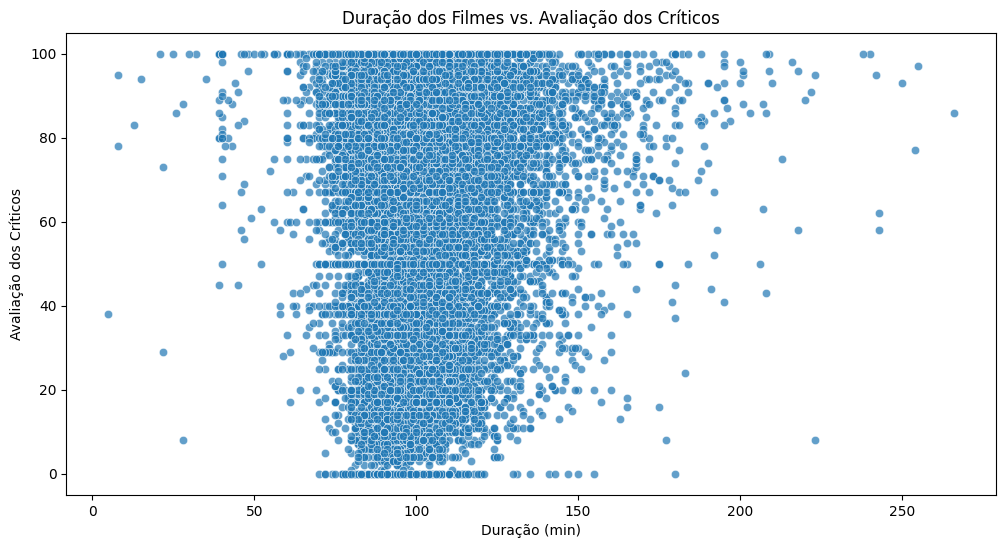

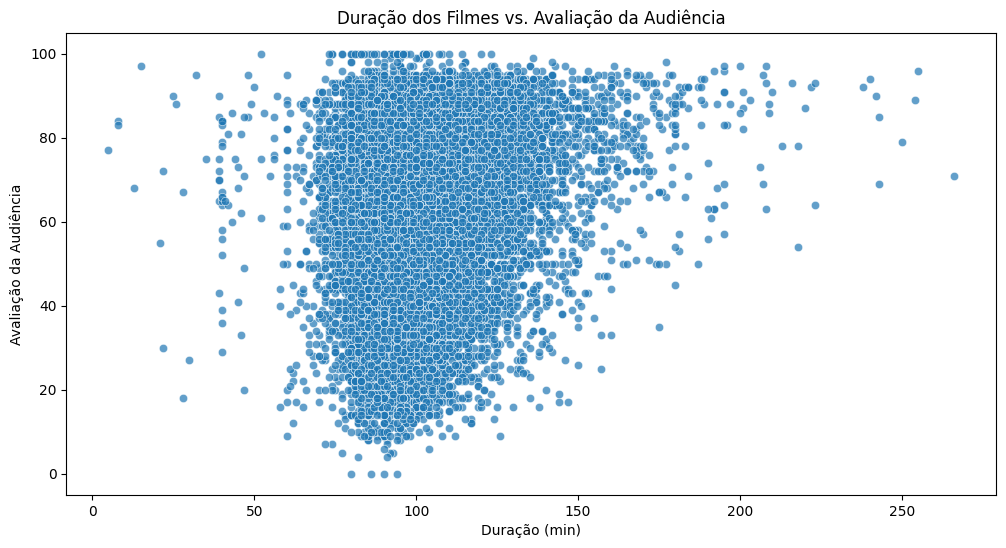

In [ ]:
"""
Questão 7: Qual é o impacto da duração dos filmes na sua avaliação em diferentes
categorias de avaliação (por exemplo, avaliação dos críticos vs. avaliação da
audiência)?
"""

# filtrar e preparar os dados
duration_ratings = rotten_tomatoes_movies_df[['runtime', 'tomatometer_rating', 'audience_rating']].dropna()

# plotar o gráfico de dispersão para avaliações dos críticos
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=duration_ratings,
    x='runtime',
    y='tomatometer_rating',
    alpha=0.7
)
plt.title('Duração dos Filmes vs. Avaliação dos Críticos')
plt.xlabel('Duração (min)')
plt.ylabel('Avaliação dos Críticos')
plt.show()

# plotar o gráfico de dispersão para avaliações da audiência
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=duration_ratings,
    x='runtime',
    y='audience_rating',
    alpha=0.7
)
plt.title('Duração dos Filmes vs. Avaliação da Audiência')
plt.xlabel('Duração (min)')
plt.ylabel('Avaliação da Audiência')
plt.show()

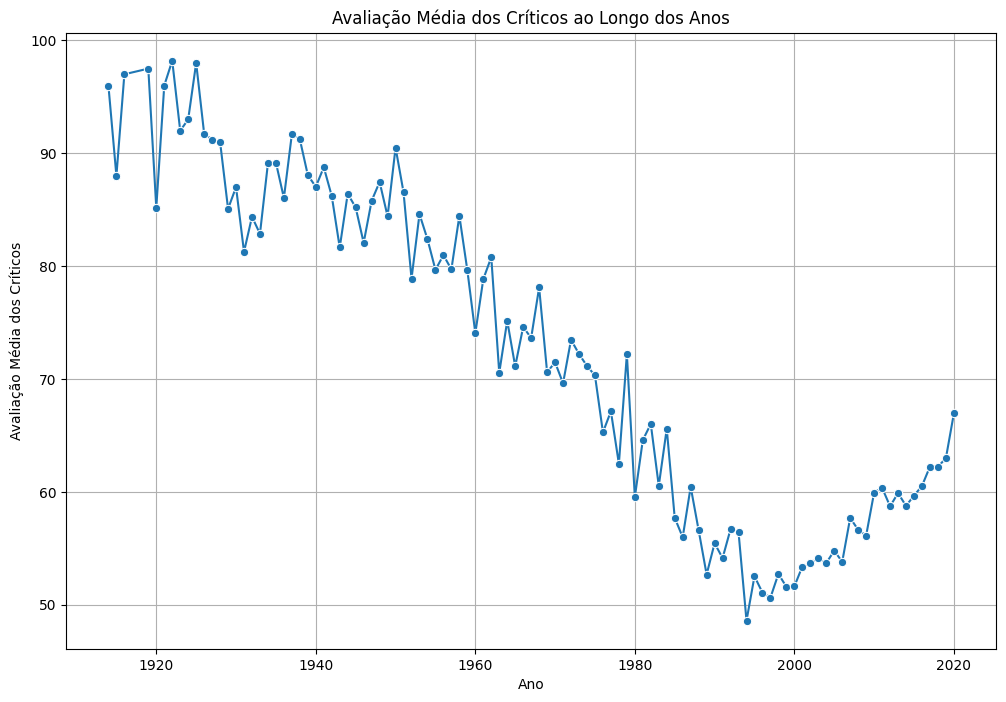

In [ ]:
"""
Questão 8: Existe uma tendência crescente na avaliação dos filmes ao longo dos
anos no Rotten Tomatoes?
"""

# filtrar e preparar os dados
yearly_ratings = rotten_tomatoes_movies_df[['original_release_date', 'tomatometer_rating']].dropna()
yearly_ratings['year'] = pd.to_datetime(yearly_ratings['original_release_date']).dt.year

# agrupar por ano e calcular a média das avaliações
yearly_ratings_summary = yearly_ratings.groupby('year')['tomatometer_rating'].mean().reset_index()

# plotar o gráfico de linhas
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=yearly_ratings_summary,
    x='year',
    y='tomatometer_rating',
    marker='o'
)
plt.title('Avaliação Média dos Críticos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Avaliação Média dos Críticos')
plt.grid(True)
plt.show()


Conclusão Final
<br>
<br>
A análise dos dados de filmes e séries da Netflix e Rotten Tomatoes trouxe informações interessantes sobre como as características dos conteúdos influenciam as avaliações de críticos e audiências. Investigando questões como o impacto da duração dos filmes nas notas e a tendência das avaliações ao longo dos anos, o estudo forneceu uma visão geral sobre como as avaliações de filmes e séries funcionam. Usar gráficos de dispersão, histogramas e outras visualizações ajudou a identificar padrões que, apesar de não serem conclusivos, mostram correlações que necessitam um maior aprofundamento.
<br>
<br>
Sobre a duração dos filmes, a análise mostrou que filmes mais longos tendem a ter avaliações mais variadas, tanto de críticos quanto de audiências. Isso sugere que a complexidade da trama ou o tempo de exibição podem afetar a percepção da qualidade. No entanto, ainda é necessário um estudo mais detalhado para confirmar se há uma relação direta e significativa entre a duração e a avaliação. Além disso, fatores como o gênero e a direção podem interagir com a duração de maneiras que não foram exploradas nesta análise.
<br>
<br>
Por fim, a análise das avaliações ao longo do tempo revelou que as notas dos críticos no Rotten Tomatoes variaram um pouco, mas não houve uma tendência clara de crescimento ou queda. Esse resultado é curioso porque desafia a ideia de que a evolução da indústria cinematográfica ou mudanças nos critérios dos críticos resultariam em avaliações consistentemente melhores ou piores. Isso indica a necessidade de explorar mais fatores que possam influenciar as avaliações ao longo do tempo, como mudanças nos gostos do público ou nas práticas de produção. Em resumo, a análise oferece uma base sólida para futuras pesquisas sobre o comportamento das avaliações e suas possíveis causas.